# K-Nearest Neighbors

K-Nearest Neighbors is a supervised learning algorithm used for both classification and regression problems. <br> 
This algorithm is non-parametric (no underlying assumptions about the data's distribution are made) and it is usually used when there is little to no information about the data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### The K in KNN

The K in KNN is a parameter that refers to the number of nearest neighbors to a particular data point that will be included in the decision making process.<br>
Consider the value of K is 5, then the algorithm will take into account the five nearest neighboring data points for determining either the class of the object by taking the most common class (classification) or the value of the target variable by averaging the corresponding target variable values of each neighbor (regression).

<img src="./Images/knn.gif" width="300">

### Distance Metrics in KNN

To calculate the distances, KNN can use various different types of distance metrics. For the algorithm to work efficiently, we need to select the most appropriate one.

<img src="./Images/distance_metrics.png" width=500>

If the distance between objects had a constraint such as when calculating distances in a city, we would use the Manhattan distance, but in this case there are no constraints so we will use the most common distance metric: Euclidean distance.

### KNN Classifier 

#### Data

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/alexxvives/Models/main/Data/KNN_data(1).csv')

x = data[['petal.length', 'petal.width']]
y = data['variety']

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


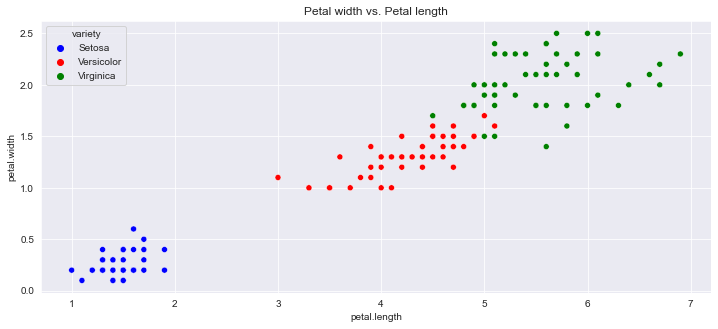

In [14]:
plt.figure(figsize=(12,5))
plt.title('Petal width vs. Petal length')
sns.scatterplot(x=x['petal.length'], y=x['petal.width'], hue=y, palette=["blue", "red", "green"])
plt.show()

Let's divide the data into training and testing sets (test set shown in gray)

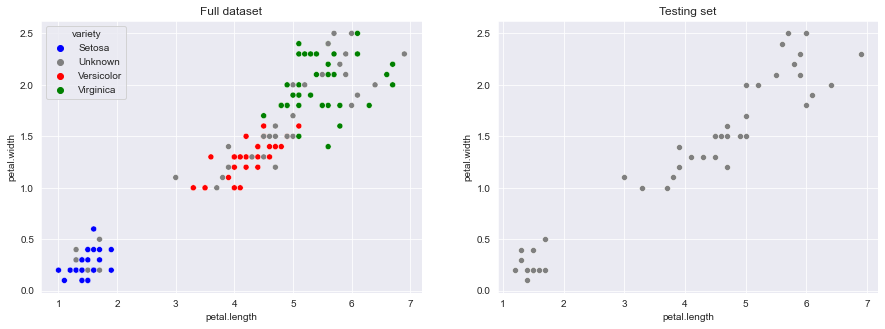

In [4]:
np.random.seed(50)
index_ = np.random.choice(len(x), int(len(x)*0.3), replace=False) # Random index of 30% of the data
X_train = x.drop(index_).reset_index(drop=True).copy()
X_test = x.iloc[index_].reset_index(drop=True).copy()
y_train = y.drop(index_).reset_index(drop=True).copy()
y_test = y.iloc[index_].to_list().copy() # Save the true labels

y.loc[index_] = 'Unknown' # Assign the category unknown to the test dataset

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x=x['petal.length'], y=x['petal.width'], hue=y, palette={'Unknown':"gray", 'Setosa':'blue', 'Versicolor':"red", 'Virginica':"green"})
axes[0].set_title('Full dataset')
sns.scatterplot(ax=axes[1], x=X_test['petal.length'], y=X_test['petal.width'], color='gray')
axes[1].set_title('Testing set')
plt.show()

#### KNN

In [5]:
# Function to calculate the euclidean distance between two points
def eucledian(point1, point2):
    return np.sqrt(np.sum(np.subtract(point1, point2)**2))

def knn_classifier(X_train, y_train, X_test, k):

    pred_labels = []
    for i in X_test.values: # Loop through the unlabeled points
        distances = [] 

        for j in X_train.values: # Loop through the labeled points
            distances.append(eucledian(i,j)) # Calculate the distance between each unlabeled point to every labeled point

        closest_points_idx = np.argsort(np.array(distances))[:k] # Store the index of the k closest labeled points
        labels = y_train[closest_points_idx]
        majority = mode(labels)[0][0] # Extract the most common label out of the k closest labeled points
        pred_labels.append(majority)
        
    return pred_labels

def model_accuracy(pred_labels, y_test):
    errors = 0
    for i in range(1, len(y_test)):
        if y_test[i] != pred_labels[i]:
            errors += 1
    
    return errors

pred_labels = knn_classifier(X_train, y_train, X_test, k=5)
errors = model_accuracy(pred_labels, y_test)

print('K-Nearest Neighbors misclassified {} of the samples.'.format(errors))

K-Nearest Neighbors misclassified 2 of the samples.


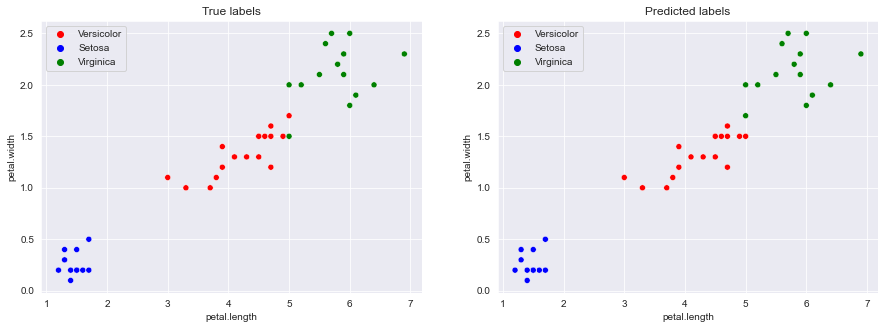

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x=X_test['petal.length'], y=X_test['petal.width'], hue=y_test, palette={'Setosa':'blue', 'Versicolor':"red", 'Virginica':"green"})
axes[0].set_title('True labels')
sns.scatterplot(ax=axes[1], x=X_test['petal.length'], y=X_test['petal.width'], hue=pred_labels, palette={'Setosa':'blue', 'Versicolor':"red", 'Virginica':"green"})
axes[1].set_title('Predicted labels')
plt.show()

The misclassified samples are between the Virginica and Versicolor groups due to its spacial proximity. <br>

#### Find the optimal K

In [ ]:
errors_list = []
k_list = np.arange(1, 100)
for k in k_list:
    pred_labels = knn_classifier(X_train, y_train, X_test, k)
    errors = model_accuracy(pred_labels, y_test)
    errors_list.append(errors)    
    #print('{}-Nearest Neighbors misclassified {} of the samples.'.format(k, errors))

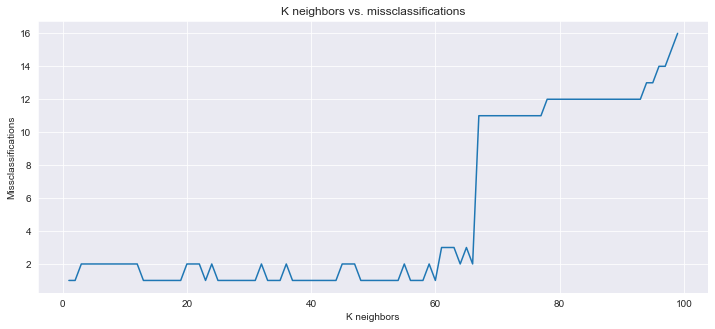

In [16]:
plt.figure(figsize=(12,5))
plt.title('K neighbors vs. missclassifications')
plt.
plt.plot(k_list, errors_list)
plt.show()

In this example there is not enough data to appreciate the difference when changing k, but in this case, the optimal values are between 4 and 9.

### KNN Regressor

#### Data

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/alexxvives/Models/main/Data/KNN_data(2).csv')

x = data['age']
y = data['bmd']

data.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


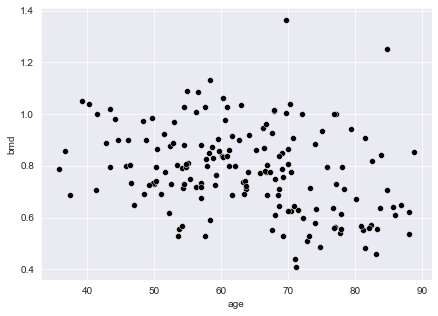

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x, y, color='k')
plt.show()

#### KNN

In [685]:
def knn_regressor(x_values, y_values, k):
    
    pred = []
    for value in x_values.sort_values():
        closest_points_idx = np.argsort(abs(x - value))[:k] # Store the index of the k closest labeled points
        pred.append(np.mean(y_values[closest_points_idx]))
    
    return pred

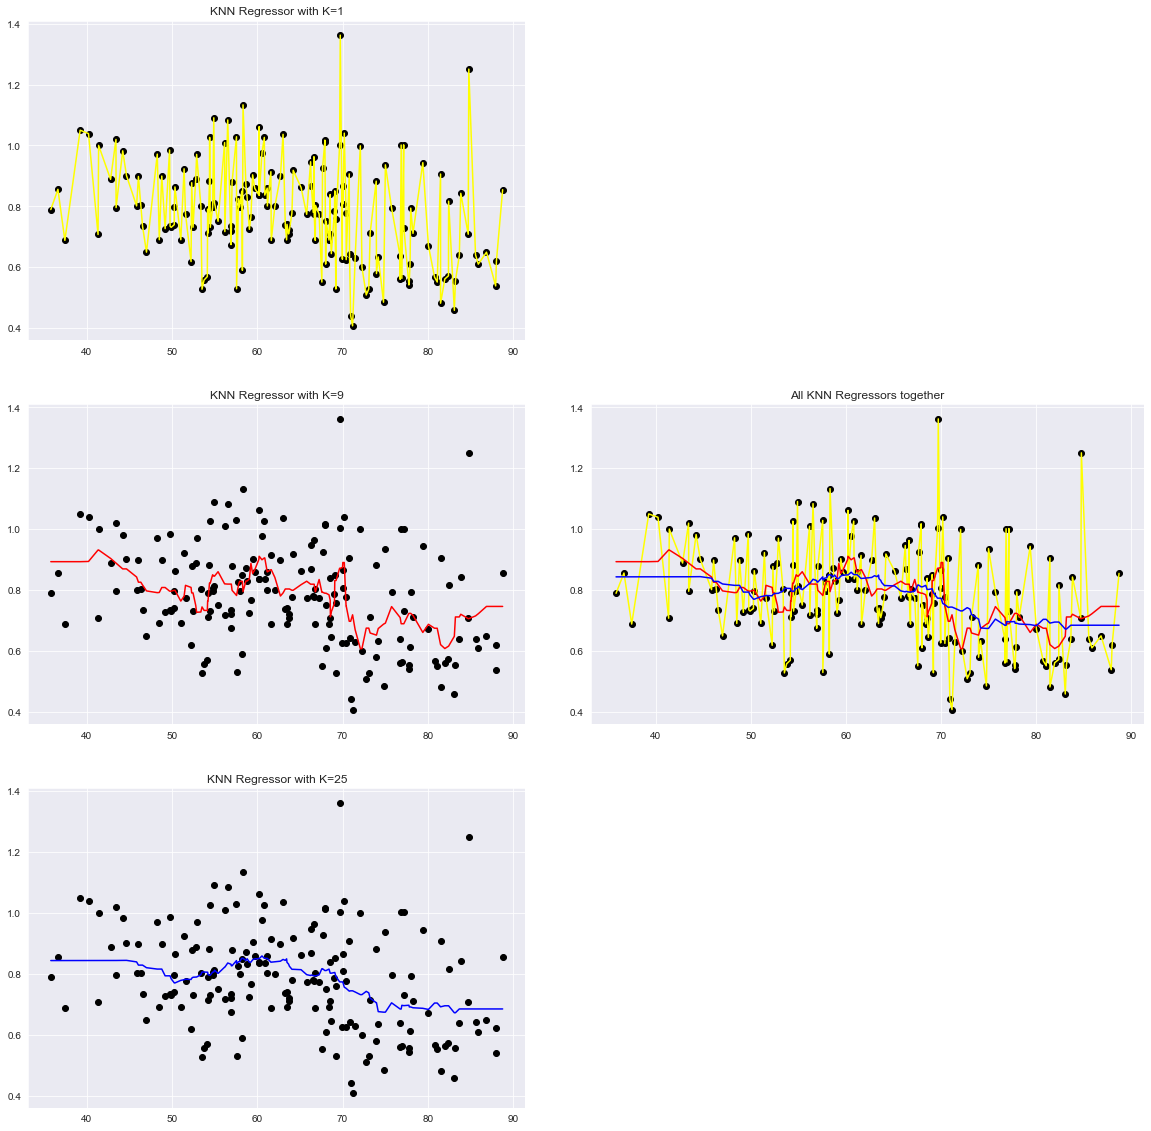

In [687]:
pred_1 = knn_regressor(x.sort_values(), y, k=1)
pred_9 = knn_regressor(x.sort_values(), y, k=9)
pred_25 = knn_regressor(x.sort_values(), y, k=25)

fig = plt.figure(figsize=(20, 20))

ax1 = plt.subplot2grid((3, 20), (0, 0), colspan=9)
ax1.scatter(x, y, color='k')
ax1.plot(x.sort_values(), pred_1, color='yellow')
ax1.set_title("KNN Regressor with K=1")

ax2 = plt.subplot2grid((3, 20), (1, 0), colspan=9)
ax2.scatter(x, y, color='k')
ax2.plot(x.sort_values(), pred_9, color='red')
ax2.set_title("KNN Regressor with K=9")

ax3 = plt.subplot2grid((3, 20), (2, 0), colspan=9)
ax3.scatter(x, y, color='k')
ax3.plot(x.sort_values(), pred_25, color='blue')
ax3.set_title("KNN Regressor with K=25")

ax4 = plt.subplot2grid((3, 20), (1, 10), colspan=11)
ax4.scatter(x, y, color='k')
ax4.plot(x.sort_values(), pred_1, color='yellow')
ax4.plot(x.sort_values(), pred_9, color='red')
ax4.plot(x.sort_values(), pred_25, color='blue')
ax4.set_title("All KNN Regressors together")

plt.show()

#### Determine k

In [689]:
pred_1 = knn_regressor(x, y, 1)
MSE_1 = np.mean((pred_1 - y)**2)

pred_9 = knn_regressor(x, y, 3)
MSE_9 = np.mean((pred_9 - y)**2)

pred_25 = knn_regressor(x, y, 20)
MSE_25 = np.mean((pred_25 - y)**2)

print('The MSE for k=1 is {}'.format(round(MSE_1,3)))
print('The MSE for k=9 is {}'.format(round(MSE_9,3)))
print('The MSE for k=20 is {}'.format(round(MSE_25,3)))

The MSE for k=1 is 0.044
The MSE for k=9 is 0.025
The MSE for k=20 is 0.022


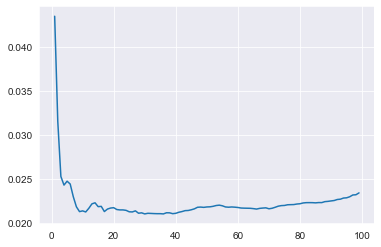

In [683]:
MSE_list = []
for i in range(1,100):
    pred = knn_regressor(x.sort_values(), y, i)
    MSE = np.mean((pred - y)**2)
    MSE_list.append(MSE)

plt.plot(range(1,100), MSE_list)
plt.show()

The optimal value for k is around 35 neighbors, but using 9 neighbors yields a very close MSE using many less neighbors, thus I would choose 9 as the optimal k.